In [1]:
using SparseIR
using PyPlot
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["text.usetex"] = true
rcParams["font.family"] = "serif"
rcParams["font.size"] = 16
rcParams["text.latex.preamble"] = raw"\usepackage{amsmath}"
using LinearAlgebra
using Revise
using Optim
using FFTW
using Zygote
include("./src/Nevanlinna.jl")

Main.Nevanlinna

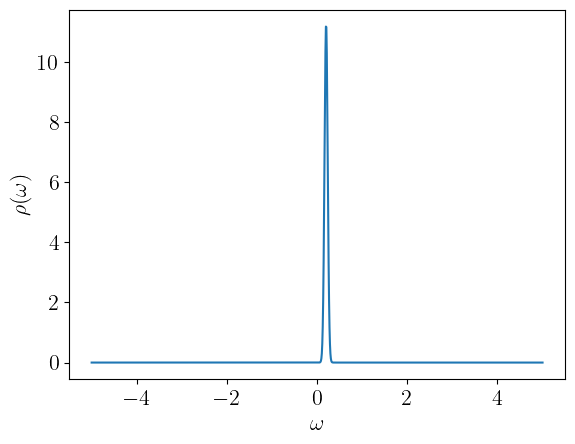

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f926cfca040>

In [2]:
# Three Gaussian peaks (normalized to 1)
gaussian(x, mu, sigma) = exp(-((x-mu)/sigma)^2)/(sqrt(π)*sigma)

#rho(omega) = gaussian(omega, 0.0, 0.15)  

#rho(omega) = gaussian(omega, 1.0, 0.15) +
#    0.4*gaussian(omega, 1.0, 0.8) + 0.4*gaussian(omega, -1.0, 0.8)

#rho(omega) = 0.4*gaussian(omega, 1.0, 0.5) + 
#    0.4*gaussian(omega, 3.0, 0.8) + 0.2*gaussian(omega, -2.0, 1.0) 

rho(omega) = gaussian(omega, 0.2, 0.05) 

omegas = LinRange(-5, 5, 1000)
plt.xlabel(L"\omega")
plt.ylabel(L"\rho(\omega)")
plt.plot(omegas, rho.(omegas))

In [3]:
beta = 100
wmax = 1000
IR_basis_set = FiniteTempBasisSet(Float64(beta), Float64(wmax), 1e-15) #もともと-7
#basis = FiniteTempBasis(fermion, beta, wmax, 1e-7)

rhol = [overlap(IR_basis_set.basis_f.v[l], rho) for l in 1:length(IR_basis_set.basis_f)]
gl = - IR_basis_set.basis_f.s .* rhol
;
#=
plt.semilogy(abs.(rhol), marker="o", label=L"|\rho_l|")
plt.semilogy(abs.(gl), marker="x", label=L"|g_l|")
plt.xlabel(L"l")
plt.ylim([1e-5, 1])
#plt.legend()
=#

In [4]:
gw = evaluate(IR_basis_set.smpl_wn_f, gl)
hnw = Int64(length(IR_basis_set.smpl_wn_f.sampling_points)/2)

71

In [5]:
setprecision(128)
;

In [6]:
test_gw   = Array{Complex{BigFloat}}(undef, hnw) 
test_smpl = Array{BigFloat}(undef, hnw) 
;

In [7]:
for i in 1:hnw
    test_smpl[i]= parse(BigFloat, string(IR_basis_set.smpl_wn_f.sampling_points[hnw+i]*pi/beta))
    test_gw[i]  = parse(BigFloat, string(real(gw[hnw+i]))) + parse(BigFloat, string(imag(gw[hnw+i])))*im
end

In [ ]:
N_real    =  6000
omega_max =  10.0
eta       =  0.001
H         =  7
N_imag    =  Nevanlinna.calc_opt_N_imag(hnw, test_smpl, test_gw)
#N_imag = 71
@time result    = Nevanlinna.Nevanlinna_Schur(N_imag, test_smpl, test_gw, N_real, omega_max, eta, H, true)
opt_real = result[2]
;

N_imag is setted as 10
Pick matrix is positive semi-definite.
Iter     Function value   Gradient norm 
     0     3.620234e+01     1.316871e+02
 * time: 0.026877880096435547
     1     1.503419e+01     8.643595e+00
 * time: 13.649105072021484
     2     1.337661e+01     3.503583e+01
 * time: 14.83051586151123
     3     1.172867e+01     6.381684e+00
 * time: 19.682882070541382
     4     5.121204e+00     2.688980e+00
 * time: 25.15916395187378
     5     4.572182e+00     2.124098e+00
 * time: 26.446912050247192
     6     4.438769e+00     1.863687e+00
 * time: 28.983908891677856
     7     4.286984e+00     1.420042e+00
 * time: 30.210572004318237
     8     4.233499e+00     1.248101e+00
 * time: 31.583627939224243
     9     4.151015e+00     1.086946e+00
 * time: 33.06429195404053
    10     4.106007e+00     1.286135e+00
 * time: 34.914427042007446
    11     4.059764e+00     3.464971e-01
 * time: 37.493021965026855
    12     4.033604e+00     4.037350e-01
 * time: 39.38829207420349
  

   119     3.866908e+00     2.379318e-05
 * time: 199.38401007652283
   120     3.866908e+00     2.469468e-05
 * time: 200.67436289787292
   121     3.866908e+00     2.582746e-05
 * time: 201.9784390926361
   122     3.866908e+00     2.734374e-05
 * time: 203.2478530406952
   123     3.866908e+00     2.850714e-05
 * time: 204.43896794319153
   124     3.866908e+00     3.053372e-05
 * time: 205.86035108566284
   125     3.866908e+00     3.204611e-05
 * time: 207.17517495155334
   126     3.866908e+00     3.412514e-05
 * time: 208.3982548713684
   127     3.866908e+00     3.593816e-05
 * time: 209.57536101341248
   128     3.866908e+00     3.773573e-05
 * time: 210.76774287223816
   129     3.866908e+00     3.969748e-05
 * time: 211.96222591400146
   130     3.866908e+00     4.129653e-05
 * time: 213.19133806228638
   131     3.866908e+00     4.339710e-05
 * time: 214.46697807312012
   132     3.866908e+00     4.512627e-05
 * time: 215.7204508781433
   133     3.866908e+00     4.745041e-

   239     3.861849e+00     8.233812e-03
 * time: 366.8635559082031
   240     3.861816e+00     6.646705e-03
 * time: 368.21208596229553
   241     3.861758e+00     7.227550e-03
 * time: 369.525269985199
   242     3.861711e+00     4.463275e-03
 * time: 370.8570568561554
   243     3.861658e+00     6.078598e-03
 * time: 372.1917259693146
   244     3.861634e+00     4.738086e-03
 * time: 373.5637938976288
   245     3.861556e+00     3.472907e-03
 * time: 374.90965700149536
   246     3.861514e+00     3.042848e-03
 * time: 376.1999840736389
   247     3.861500e+00     3.410110e-03
 * time: 377.732097864151
   248     3.861487e+00     3.088946e-03
 * time: 379.3233790397644
   249     3.861476e+00     1.776029e-03
 * time: 380.62996888160706
   250     3.861467e+00     1.707512e-03
 * time: 382.08850288391113
   251     3.861464e+00     1.014206e-03
 * time: 383.79572796821594
   252     3.861463e+00     2.385219e-04
 * time: 386.05009293556213
   253     3.861463e+00     8.126405e-04
 * 

   359     3.861457e+00     5.323665e-05
 * time: 550.6426658630371
   360     3.861457e+00     5.375287e-05
 * time: 552.6635558605194
   361     3.861457e+00     3.579624e-05
 * time: 554.5852580070496
   362     3.861457e+00     4.301373e-05
 * time: 556.9266259670258
   363     3.861457e+00     1.672421e-05
 * time: 558.4281930923462
   364     3.861457e+00     5.200636e-05
 * time: 560.6055159568787
   365     3.861457e+00     2.551280e-05
 * time: 561.964194059372
   366     3.861457e+00     3.686504e-05
 * time: 564.4018008708954
   367     3.861457e+00     1.981407e-05
 * time: 565.6890330314636
   368     3.861457e+00     2.874808e-05
 * time: 567.5025169849396
   369     3.861457e+00     2.377428e-05
 * time: 568.8453950881958
   370     3.861457e+00     2.922262e-05
 * time: 570.6502430438995
   371     3.861457e+00     1.470708e-05
 * time: 571.9765808582306
   372     3.861457e+00     2.570909e-05
 * time: 574.0335659980774
   373     3.861457e+00     1.109039e-05
 * time:

   480     3.861457e+00     5.256713e-06
 * time: 740.0079760551453
   481     3.861457e+00     5.256311e-06
 * time: 741.4959940910339
   482     3.861457e+00     4.819588e-06
 * time: 742.8001680374146
   483     3.861457e+00     3.911263e-06
 * time: 744.0426080226898
   484     3.861457e+00     4.741104e-06
 * time: 745.4784409999847
   485     3.861457e+00     2.597370e-06
 * time: 746.7617719173431
   486     3.861457e+00     4.832303e-06
 * time: 748.1103479862213
   487     3.861457e+00     2.439482e-06
 * time: 749.704106092453
   488     3.861457e+00     4.503710e-06
 * time: 751.0000638961792
   489     3.861457e+00     2.520420e-06
 * time: 752.2059299945831
   490     3.861457e+00     3.653209e-06
 * time: 753.5306289196014
   491     3.861457e+00     1.767286e-06
 * time: 754.8077490329742
   492     3.861457e+00     3.701353e-06
 * time: 755.9456629753113
   493     3.861457e+00     1.762697e-06
 * time: 757.1066908836365
   494     3.861457e+00     3.971440e-06
 * time:

   601     3.861457e+00     4.479990e-06
 * time: 917.6273438930511
   602     3.861457e+00     4.677584e-06
 * time: 918.823273897171
   603     3.861457e+00     5.208496e-06
 * time: 920.0599739551544
   604     3.861457e+00     4.663648e-06
 * time: 921.3362290859222
   605     3.861457e+00     5.323958e-06
 * time: 922.5674390792847
   606     3.861457e+00     4.563070e-06
 * time: 923.7545819282532
   607     3.861457e+00     4.995376e-06
 * time: 925.011796951294
   608     3.861457e+00     4.435336e-06
 * time: 926.2129330635071
   609     3.861457e+00     4.500994e-06
 * time: 927.5518789291382
   610     3.861457e+00     4.798333e-06
 * time: 928.8686590194702
   611     3.861457e+00     4.277984e-06
 * time: 930.083153963089
   612     3.861457e+00     5.221819e-06
 * time: 931.3257339000702
   613     3.861457e+00     4.551525e-06
 * time: 932.5218780040741
   614     3.861457e+00     5.323857e-06
 * time: 933.7662010192871
   615     3.861457e+00     4.618304e-06
 * time: 9

   722     3.861457e+00     6.600535e-06
 * time: 1071.0885739326477
   723     3.861457e+00     5.474693e-06
 * time: 1072.348464012146
   724     3.861457e+00     6.393722e-06
 * time: 1074.2438380718231
   725     3.861457e+00     6.194198e-06
 * time: 1075.4618299007416
   726     3.861457e+00     7.652985e-06
 * time: 1077.2822768688202
   727     3.861457e+00     7.090533e-06
 * time: 1078.4961459636688
   728     3.861457e+00     8.373401e-06
 * time: 1080.3365938663483
   729     3.861457e+00     7.531753e-06
 * time: 1081.5749928951263
   730     3.861457e+00     6.702903e-06
 * time: 1083.4990620613098
   731     3.861457e+00     6.108134e-06
 * time: 1084.858766078949
   732     3.861457e+00     8.146127e-06
 * time: 1087.0376958847046
   733     3.861457e+00     7.434190e-06
 * time: 1088.2982189655304
   734     3.861457e+00     9.152260e-06
 * time: 1090.1521289348602
   735     3.861457e+00     8.807617e-06
 * time: 1091.333436012268
   736     3.861457e+00     7.356309e

   842     3.861457e+00     1.125667e-05
 * time: 1222.9753680229187
   843     3.861457e+00     1.012387e-05
 * time: 1224.224524974823
   844     3.861457e+00     1.193386e-05
 * time: 1225.3927149772644
   845     3.861457e+00     1.092397e-05
 * time: 1226.5570120811462
   846     3.861457e+00     1.116141e-05
 * time: 1228.3604209423065
   847     3.861457e+00     1.004655e-05
 * time: 1229.5233209133148
   848     3.861457e+00     9.624503e-06
 * time: 1231.2667899131775
   849     3.861457e+00     9.077779e-06
 * time: 1232.39057803154
   850     3.861457e+00     1.005759e-05
 * time: 1234.118793964386
   851     3.861457e+00     9.526483e-06
 * time: 1235.2356848716736
   852     3.861457e+00     1.019023e-05
 * time: 1236.9535710811615
   853     3.861457e+00     9.285853e-06
 * time: 1238.0542440414429
   854     3.861457e+00     1.110373e-05
 * time: 1239.7709579467773
   855     3.861457e+00     1.003218e-05
 * time: 1240.9268400669098
   856     3.861457e+00     1.041039e-

   962     3.861457e+00     1.630625e-05
 * time: 1417.9424669742584
   963     3.861457e+00     1.574770e-05
 * time: 1419.156564950943
   964     3.861457e+00     1.646364e-05
 * time: 1420.4532308578491
   965     3.861457e+00     1.566088e-05
 * time: 1421.7522180080414
   966     3.861457e+00     1.613849e-05
 * time: 1422.9681730270386
   967     3.861457e+00     1.536929e-05
 * time: 1424.192048072815
   968     3.861457e+00     1.545929e-05
 * time: 1425.815593957901
   969     3.861457e+00     1.498616e-05
 * time: 1427.0523149967194
   970     3.861457e+00     1.505316e-05
 * time: 1428.3307659626007
   971     3.861457e+00     1.452790e-05
 * time: 1429.8952219486237
   972     3.861457e+00     1.467097e-05
 * time: 1431.2038559913635
   973     3.861457e+00     1.410955e-05
 * time: 1432.4817159175873
   974     3.861457e+00     1.449627e-05
 * time: 1433.6867198944092
   975     3.861457e+00     1.492034e-05
 * time: 1435.0056538581848
   976     3.861457e+00     1.496299e

  1082     3.861457e+00     2.230023e-05
 * time: 1586.4116840362549
  1083     3.861457e+00     2.162716e-05
 * time: 1587.687232017517
  1084     3.861457e+00     2.266796e-05
 * time: 1588.9151148796082
  1085     3.861457e+00     2.143963e-05
 * time: 1590.0281019210815
  1086     3.861457e+00     2.174969e-05
 * time: 1591.1725199222565
  1087     3.861457e+00     2.004277e-05
 * time: 1592.371190071106
  1088     3.861457e+00     1.998830e-05
 * time: 1593.767539024353
  1089     3.861457e+00     1.977407e-05
 * time: 1595.6218740940094
  1090     3.861457e+00     2.003170e-05
 * time: 1597.0131440162659
  1091     3.861457e+00     2.083639e-05
 * time: 1599.0729870796204
  1092     3.861457e+00     2.032008e-05
 * time: 1602.4318969249725
  1093     3.861457e+00     2.110218e-05
 * time: 1605.5063569545746
  1094     3.861457e+00     2.003901e-05
 * time: 1607.600359916687
  1095     3.861457e+00     2.062559e-05
 * time: 1608.8587980270386
  1096     3.861457e+00     1.935511e-

  1202     3.861457e+00     2.903797e-05
 * time: 1765.9580039978027
  1203     3.861457e+00     2.878205e-05
 * time: 1767.2448439598083
  1204     3.861457e+00     2.941642e-05
 * time: 1768.6981098651886
  1205     3.861457e+00     2.871641e-05
 * time: 1769.947870016098
  1206     3.861457e+00     2.915310e-05
 * time: 1771.141205072403
  1207     3.861457e+00     2.801418e-05
 * time: 1772.322853088379
  1208     3.861457e+00     2.889494e-05
 * time: 1773.548497915268
  1209     3.861457e+00     2.802239e-05
 * time: 1774.7426919937134
  1210     3.861457e+00     2.928834e-05
 * time: 1775.9463229179382
  1211     3.861457e+00     2.806348e-05
 * time: 1777.1397960186005
  1212     3.861457e+00     2.967130e-05
 * time: 1778.3856899738312
  1213     3.861457e+00     2.814200e-05
 * time: 1779.6370739936829
  1214     3.861457e+00     3.001710e-05
 * time: 1780.8578698635101
  1215     3.861457e+00     2.827353e-05
 * time: 1782.0734238624573
  1216     3.861457e+00     3.031438e-

  1322     3.861457e+00     4.430614e-05
 * time: 1927.0725500583649
  1323     3.861457e+00     4.156135e-05
 * time: 1928.358039855957
  1324     3.861457e+00     4.255394e-05
 * time: 1929.6116540431976
  1325     3.861457e+00     3.912285e-05
 * time: 1930.8998639583588
  1326     3.861457e+00     4.042751e-05
 * time: 1932.1391909122467
  1327     3.861457e+00     3.762106e-05
 * time: 1933.399225950241
  1328     3.861457e+00     4.143351e-05
 * time: 1934.6346130371094
  1329     3.861457e+00     4.218505e-05
 * time: 1935.8196439743042
  1330     3.861457e+00     4.415946e-05
 * time: 1936.9762179851532
  1331     3.861457e+00     4.552818e-05
 * time: 1938.184247970581
  1332     3.861457e+00     4.483596e-05
 * time: 1939.3559529781342
  1333     3.861457e+00     4.585572e-05
 * time: 1940.5714299678802
  1334     3.861457e+00     4.244235e-05
 * time: 1941.7354390621185
  1335     3.861457e+00     4.029209e-05
 * time: 1943.029578924179
  1336     3.861457e+00     4.693107e-

  1442     3.861456e+00     6.093219e-05
 * time: 2124.1739308834076
  1443     3.861456e+00     6.308718e-05
 * time: 2125.899484872818
  1444     3.861456e+00     6.490316e-05
 * time: 2127.513077020645
  1445     3.861456e+00     6.989155e-05
 * time: 2129.217628955841
  1446     3.861456e+00     7.483996e-05
 * time: 2130.846642971039
  1447     3.861456e+00     7.676128e-05
 * time: 2132.794380903244
  1448     3.861456e+00     7.850339e-05
 * time: 2134.8914980888367
  1449     3.861456e+00     8.081680e-05
 * time: 2136.8677649497986
  1450     3.861456e+00     7.966722e-05
 * time: 2138.5481748580933
  1451     3.861456e+00     7.987686e-05
 * time: 2140.405380964279
  1452     3.861456e+00     7.737711e-05
 * time: 2142.224963903427
  1453     3.861456e+00     7.536827e-05
 * time: 2143.9497668743134
  1454     3.861456e+00     7.283293e-05
 * time: 2145.6031770706177
  1455     3.861456e+00     6.885044e-05
 * time: 2147.4224219322205
  1456     3.861456e+00     6.720064e-05


  1562     3.861456e+00     1.031885e-04
 * time: 2361.7906229496
  1563     3.861456e+00     8.729811e-05
 * time: 2363.4879410266876
  1564     3.861456e+00     8.088861e-05
 * time: 2366.1734828948975
  1565     3.861456e+00     7.985444e-05
 * time: 2367.851110935211
  1566     3.861456e+00     8.779276e-05
 * time: 2370.430820941925
  1567     3.861456e+00     8.665241e-05
 * time: 2372.1865599155426
  1568     3.861456e+00     9.943118e-05
 * time: 2374.9656689167023
  1569     3.861456e+00     9.740988e-05
 * time: 2376.6586339473724
  1570     3.861456e+00     1.097641e-04
 * time: 2379.182725906372
  1571     3.861456e+00     1.073174e-04
 * time: 2380.8723640441895
  1572     3.861456e+00     1.139932e-04
 * time: 2383.3474400043488
  1573     3.861456e+00     1.046283e-04
 * time: 2385.0293118953705
  1574     3.861456e+00     9.695684e-05
 * time: 2387.4489800930023
  1575     3.861456e+00     8.106031e-05
 * time: 2389.21253490448
  1576     3.861456e+00     7.862556e-05
 

  1682     3.861456e+00     1.250084e-04
 * time: 2609.70836687088
  1683     3.861456e+00     1.186860e-04
 * time: 2611.285892009735
  1684     3.861456e+00     1.255306e-04
 * time: 2613.6754648685455
  1685     3.861456e+00     1.214391e-04
 * time: 2615.2580058574677
  1686     3.861456e+00     1.570358e-04
 * time: 2617.558263063431
  1687     3.861456e+00     1.516218e-04
 * time: 2619.1300718784332
  1688     3.861456e+00     1.488553e-04
 * time: 2621.463010072708
  1689     3.861456e+00     1.416442e-04
 * time: 2623.0712609291077
  1690     3.861455e+00     1.193588e-04
 * time: 2625.439470052719
  1691     3.861455e+00     1.091464e-04
 * time: 2627.0062069892883
  1692     3.861455e+00     1.117399e-04
 * time: 2629.378107070923
  1693     3.861455e+00     1.023103e-04
 * time: 2630.992915868759
  1694     3.861455e+00     1.198013e-04
 * time: 2633.4160828590393
  1695     3.861455e+00     1.075378e-04
 * time: 2634.9631309509277
  1696     3.861455e+00     1.276781e-04
 

  1802     3.861455e+00     2.700378e-04
 * time: 2854.3340010643005
  1803     3.861455e+00     2.067881e-04
 * time: 2855.9830639362335
  1804     3.861455e+00     2.165042e-04
 * time: 2857.6116149425507
  1805     3.861455e+00     2.009957e-04
 * time: 2859.2808649539948
  1806     3.861455e+00     2.102360e-04
 * time: 2860.923574924469
  1807     3.861455e+00     1.913818e-04
 * time: 2862.555214881897
  1808     3.861455e+00     1.977376e-04
 * time: 2864.207184076309
  1809     3.861455e+00     1.790403e-04
 * time: 2865.823179960251
  1810     3.861455e+00     1.817214e-04
 * time: 2867.6090140342712
  1811     3.861455e+00     1.650134e-04
 * time: 2869.227779865265
  1812     3.861455e+00     1.638560e-04
 * time: 2870.9474608898163
  1813     3.861455e+00     1.582917e-04
 * time: 2872.564162015915
  1814     3.861455e+00     1.595363e-04
 * time: 2874.225821018219
  1815     3.861455e+00     1.652167e-04
 * time: 2875.9364750385284
  1816     3.861454e+00     1.698359e-04


  1922     3.861453e+00     1.939504e-04
 * time: 3070.2972519397736
  1923     3.861453e+00     2.214229e-04
 * time: 3071.9788448810577
  1924     3.861453e+00     1.803196e-04
 * time: 3073.6652760505676
  1925     3.861453e+00     3.318650e-04
 * time: 3076.464179992676
  1926     3.861453e+00     1.446349e-04
 * time: 3078.1661438941956
  1927     3.861453e+00     1.737941e-04
 * time: 3079.824501991272
  1928     3.861453e+00     2.475074e-04
 * time: 3082.3439490795135
  1929     3.861453e+00     2.372136e-04
 * time: 3084.009733915329
  1930     3.861453e+00     2.519051e-04
 * time: 3086.47380900383
  1931     3.861453e+00     2.215102e-04
 * time: 3088.13471698761
  1932     3.861453e+00     2.228179e-04
 * time: 3090.620260000229
  1933     3.861452e+00     2.254339e-04
 * time: 3092.3352739810944
  1934     3.861452e+00     3.178529e-04
 * time: 3094.754252910614
  1935     3.861452e+00     2.666473e-04
 * time: 3096.4257140159607
  1936     3.861452e+00     2.565197e-04
 *

  2042     3.861447e+00     1.843211e-04
 * time: 3311.2953090667725
  2043     3.861447e+00     2.788559e-04
 * time: 3312.901057958603
  2044     3.861447e+00     1.558679e-04
 * time: 3314.5098490715027
  2045     3.861447e+00     3.089542e-04
 * time: 3316.099233865738
  2046     3.861447e+00     1.771414e-04
 * time: 3317.7405500411987
  2047     3.861447e+00     3.122331e-04
 * time: 3319.2712500095367
  2048     3.861447e+00     2.013073e-04
 * time: 3320.8097429275513
  2049     3.861447e+00     3.024725e-04
 * time: 3322.377522945404
  2050     3.861447e+00     2.223841e-04
 * time: 3323.990263938904
  2051     3.861447e+00     3.132450e-04
 * time: 3325.8865959644318
  2052     3.861447e+00     2.536030e-04
 * time: 3327.5745770931244
  2053     3.861447e+00     3.471242e-04
 * time: 3329.1784319877625
  2054     3.861447e+00     2.917632e-04
 * time: 3330.8311989307404
  2055     3.861447e+00     3.792999e-04
 * time: 3332.4558238983154
  2056     3.861447e+00     3.203665e-

  2162     3.861442e+00     2.331308e-04
 * time: 3523.671881914139
  2163     3.861442e+00     6.834172e-04
 * time: 3525.4420449733734
  2164     3.861442e+00     4.284562e-04
 * time: 3527.1987869739532
  2165     3.861442e+00     3.753853e-04
 * time: 3528.870635032654
  2166     3.861441e+00     4.527093e-04
 * time: 3530.598093032837
  2167     3.861441e+00     3.699238e-04
 * time: 3532.3080599308014
  2168     3.861441e+00     4.387135e-04
 * time: 3533.957941055298
  2169     3.861441e+00     3.392912e-04
 * time: 3535.6374509334564
  2170     3.861441e+00     3.943106e-04
 * time: 3537.3112139701843
  2171     3.861441e+00     2.927061e-04
 * time: 3539.006612062454
  2172     3.861441e+00     3.307132e-04
 * time: 3540.6391730308533
  2173     3.861441e+00     2.449718e-04
 * time: 3542.273771047592
  2174     3.861441e+00     2.632773e-04
 * time: 3544.0246119499207
  2175     3.861441e+00     3.176911e-04
 * time: 3545.7404029369354
  2176     3.861441e+00     2.572188e-04

  2282     3.861431e+00     1.031484e-03
 * time: 3747.7152009010315
  2283     3.861431e+00     4.090221e-04
 * time: 3750.2289578914642
  2284     3.861430e+00     1.400452e-03
 * time: 3752.7460050582886
  2285     3.861429e+00     7.923173e-04
 * time: 3755.4173090457916
  2286     3.861429e+00     6.808610e-04
 * time: 3757.050210952759
  2287     3.861429e+00     6.586262e-04
 * time: 3758.774270057678
  2288     3.861429e+00     4.811292e-04
 * time: 3760.4381959438324
  2289     3.861429e+00     3.558473e-04
 * time: 3762.341434955597
  2290     3.861429e+00     5.965621e-04
 * time: 3765.209897041321
  2291     3.861429e+00     3.975948e-04
 * time: 3766.863655090332
  2292     3.861429e+00     8.079016e-04
 * time: 3770.2468469142914
  2293     3.861428e+00     6.642422e-04
 * time: 3771.897763967514
  2294     3.861428e+00     4.428610e-04
 * time: 3774.4012548923492
  2295     3.861428e+00     5.398389e-04
 * time: 3776.081750869751
  2296     3.861428e+00     2.973391e-04


  2402     3.861417e+00     2.200543e-04
 * time: 3967.1856639385223
  2403     3.861417e+00     3.309645e-04
 * time: 3968.8342039585114
  2404     3.861417e+00     2.733590e-04
 * time: 3970.411453962326
  2405     3.861417e+00     3.065474e-04
 * time: 3971.9876198768616
  2406     3.861417e+00     4.062214e-04
 * time: 3973.538451910019
  2407     3.861417e+00     2.483039e-04
 * time: 3975.127748966217
  2408     3.861416e+00     1.165650e-03
 * time: 3976.7383658885956
  2409     3.861416e+00     5.055959e-04
 * time: 3979.304626941681
  2410     3.861416e+00     1.347111e-03
 * time: 3980.817170858383
  2411     3.861415e+00     7.227764e-04
 * time: 3983.239341020584
  2412     3.861415e+00     1.421426e-03
 * time: 3985.588697910309
  2413     3.861414e+00     6.103088e-04
 * time: 3988.9106068611145
  2414     3.861414e+00     1.260875e-03
 * time: 3991.3786709308624
  2415     3.861413e+00     3.767848e-04
 * time: 3994.6521508693695
  2416     3.861413e+00     1.183840e-03


  2523     3.861392e+00     5.588082e-04
 * time: 4208.082953929901
  2524     3.861392e+00     7.649772e-04
 * time: 4209.680299043655
  2525     3.861392e+00     4.547383e-04
 * time: 4211.342494010925
  2526     3.861392e+00     6.204660e-04
 * time: 4212.9414348602295
  2527     3.861392e+00     3.260287e-04
 * time: 4214.632791042328
  2528     3.861392e+00     6.678178e-04
 * time: 4216.234952926636
  2529     3.861392e+00     5.298825e-04
 * time: 4218.046587944031
  2530     3.861391e+00     9.627201e-04
 * time: 4220.5061728954315
  2531     3.861391e+00     7.129647e-04
 * time: 4222.121023893356
  2532     3.861389e+00     3.412210e-03
 * time: 4225.506144046783
  2533     3.861389e+00     2.659742e-03
 * time: 4227.101881980896
  2534     3.861387e+00     1.504718e-03
 * time: 4229.51930308342
  2535     3.861387e+00     1.044160e-03
 * time: 4231.184364080429
  2536     3.861387e+00     7.720866e-04
 * time: 4232.772451877594
  2537     3.861387e+00     4.840412e-04
 * tim

  2644     3.861363e+00     1.037483e-03
 * time: 4437.597563028336
  2645     3.861363e+00     4.568295e-04
 * time: 4439.320107936859
  2646     3.861363e+00     9.625894e-04
 * time: 4441.047472953796
  2647     3.861363e+00     3.691298e-04
 * time: 4442.682254076004
  2648     3.861363e+00     8.414465e-04
 * time: 4444.6208329200745
  2649     3.861363e+00     2.318273e-04
 * time: 4446.387145042419
  2650     3.861363e+00     7.849368e-04
 * time: 4448.316411972046
  2651     3.861362e+00     4.070359e-04
 * time: 4450.278765916824
  2652     3.861362e+00     8.825097e-04
 * time: 4452.044236898422
  2653     3.861362e+00     4.927489e-04
 * time: 4453.762093067169
  2654     3.861362e+00     1.052835e-03
 * time: 4455.420444965363
  2655     3.861362e+00     4.636540e-04
 * time: 4457.140261888504
  2656     3.861362e+00     1.254675e-03
 * time: 4459.723731040955
  2657     3.861362e+00     4.487573e-04
 * time: 4461.422254085541
  2658     3.861362e+00     1.977518e-03
 * tim

  2765     3.861328e+00     8.217646e-04
 * time: 4684.676599025726
  2766     3.861326e+00     5.046864e-03
 * time: 4687.149230003357
  2767     3.861325e+00     7.507043e-04
 * time: 4690.433491945267
  2768     3.861323e+00     8.326289e-04
 * time: 4692.836768865585
  2769     3.861322e+00     5.597948e-03
 * time: 4695.220995903015
  2770     3.861320e+00     9.605327e-04
 * time: 4697.763352870941
  2771     3.861320e+00     3.853276e-03
 * time: 4699.527769088745
  2772     3.861319e+00     8.306672e-04
 * time: 4702.6890659332275
  2773     3.861318e+00     4.280740e-03
 * time: 4704.240143060684
  2774     3.861317e+00     4.468951e-04
 * time: 4707.39817404747
  2775     3.861316e+00     3.811833e-03
 * time: 4708.968811988831
  2776     3.861315e+00     3.584336e-04
 * time: 4712.164402961731
  2777     3.861314e+00     4.415236e-03
 * time: 4714.56463599205
  2778     3.861313e+00     6.815990e-04
 * time: 4717.899402856827
  2779     3.861312e+00     3.754294e-03
 * time:

  2886     3.861276e+00     1.008749e-03
 * time: 4939.037707090378
  2887     3.861275e+00     1.279369e-03
 * time: 4940.741622924805
  2888     3.861275e+00     1.142419e-03
 * time: 4942.452018022537
  2889     3.861275e+00     1.369234e-03
 * time: 4944.150065898895
  2890     3.861275e+00     1.136229e-03
 * time: 4945.818598985672
  2891     3.861275e+00     1.382598e-03
 * time: 4947.751753091812
  2892     3.861275e+00     9.426864e-04
 * time: 4949.540764093399
  2893     3.861275e+00     1.291302e-03
 * time: 4951.22984790802
  2894     3.861275e+00     6.601008e-04
 * time: 4953.11612701416
  2895     3.861275e+00     1.522388e-03
 * time: 4954.82516002655
  2896     3.861274e+00     7.783930e-04
 * time: 4956.552809000015
  2897     3.861274e+00     1.677685e-03
 * time: 4958.258624076843
  2898     3.861274e+00     8.327752e-04
 * time: 4960.047546863556
  2899     3.861274e+00     1.722037e-03
 * time: 4961.747643947601
  2900     3.861274e+00     7.756828e-04
 * time: 4

  3007     3.861222e+00     7.577408e-04
 * time: 5158.402292013168
  3008     3.861222e+00     1.089037e-03
 * time: 5160.010227918625
  3009     3.861222e+00     7.999930e-04
 * time: 5161.542298078537
  3010     3.861222e+00     1.106002e-03
 * time: 5163.100430965424
  3011     3.861222e+00     8.220011e-04
 * time: 5164.7993240356445
  3012     3.861222e+00     1.115215e-03
 * time: 5166.451762914658
  3013     3.861222e+00     8.324929e-04
 * time: 5168.095484018326
  3014     3.861222e+00     1.113818e-03
 * time: 5169.6100108623505
  3015     3.861222e+00     8.269860e-04
 * time: 5171.229484081268
  3016     3.861222e+00     1.105970e-03
 * time: 5172.767028093338
  3017     3.861222e+00     8.170172e-04
 * time: 5174.389970064163
  3018     3.861221e+00     1.123833e-03
 * time: 5175.995867967606
  3019     3.861221e+00     8.117355e-04
 * time: 5177.584708929062
  3020     3.861221e+00     1.141313e-03
 * time: 5179.19939494133
  3021     3.861221e+00     8.354385e-04
 * tim

  3128     3.861183e+00     4.676164e-04
 * time: 5371.919102907181
  3129     3.861183e+00     4.906167e-03
 * time: 5374.341234922409
  3130     3.861183e+00     3.956565e-04
 * time: 5375.863915920258
  3131     3.861172e+00     8.791723e-03
 * time: 5380.052156925201
  3132     3.861171e+00     2.377515e-03
 * time: 5382.427202939987
  3133     3.861169e+00     4.435557e-04
 * time: 5385.2821180820465
  3134     3.861168e+00     2.279332e-03
 * time: 5387.710779905319
  3135     3.861167e+00     2.013664e-03
 * time: 5389.295598983765
  3136     3.861167e+00     2.364890e-03
 * time: 5390.935793876648
  3137     3.861166e+00     4.467053e-03
 * time: 5392.511704921722
  3138     3.861166e+00     1.215590e-03
 * time: 5394.1214599609375
  3139     3.861165e+00     1.807769e-03
 * time: 5395.7432470321655
  3140     3.861165e+00     1.493121e-03
 * time: 5397.365839004517
  3141     3.861164e+00     4.151972e-04
 * time: 5398.958369970322
  3142     3.861164e+00     1.956821e-03
 * t

  3249     3.861115e+00     4.590685e-04
 * time: 5588.299475908279
  3250     3.861115e+00     1.991343e-03
 * time: 5589.885506868362
  3251     3.861115e+00     5.020945e-04
 * time: 5591.42144203186
  3252     3.861115e+00     2.218893e-03
 * time: 5592.972617864609
  3253     3.861115e+00     4.280430e-04
 * time: 5594.537432909012
  3254     3.861115e+00     2.584993e-03
 * time: 5596.191642045975
  3255     3.861115e+00     2.585849e-04
 * time: 5597.692030906677
  3256     3.861115e+00     3.207967e-03
 * time: 5599.313284873962
  3257     3.861115e+00     1.926898e-04
 * time: 5600.887913942337
  3258     3.861114e+00     4.755090e-03
 * time: 5603.236643075943
  3259     3.861114e+00     5.864391e-04
 * time: 5604.811784029007
  3260     3.861114e+00     5.632266e-03
 * time: 5607.164407014847
  3261     3.861113e+00     5.168989e-04
 * time: 5608.886720895767
  3262     3.861112e+00     1.236338e-02
 * time: 5612.07640004158
  3263     3.861110e+00     7.273726e-04
 * time: 

  3370     3.861077e+00     5.453886e-04
 * time: 5816.012801885605
  3371     3.861075e+00     1.763795e-02
 * time: 5818.372708082199
  3372     3.861073e+00     8.170260e-04
 * time: 5821.1197509765625
  3373     3.861065e+00     2.214872e-02
 * time: 5824.402292013168
  3374     3.861063e+00     4.007839e-03
 * time: 5828.645868062973
  3375     3.861059e+00     5.095381e-04
 * time: 5831.068502902985
  3376     3.861058e+00     4.905555e-03
 * time: 5833.468458890915
  3377     3.861058e+00     7.158691e-04
 * time: 5835.062700033188
  3378     3.861057e+00     2.818970e-03
 * time: 5837.617690086365
  3379     3.861057e+00     1.549025e-03
 * time: 5839.188222885132
  3380     3.861057e+00     4.317484e-03
 * time: 5840.9537880420685
  3381     3.861057e+00     1.026402e-03
 * time: 5842.597373962402
  3382     3.861057e+00     4.030047e-03
 * time: 5844.191035985947
  3383     3.861056e+00     4.861560e-04
 * time: 5845.86288189888
  3384     3.861056e+00     3.882105e-03
 * tim

  3491     3.861030e+00     2.963182e-03
 * time: 6027.972920894623
  3492     3.861030e+00     1.339465e-03
 * time: 6029.5018100738525
  3493     3.861030e+00     3.055298e-03
 * time: 6031.070657014847
  3494     3.861030e+00     1.226477e-03
 * time: 6032.8075840473175
  3495     3.861030e+00     3.113142e-03
 * time: 6034.393056869507
  3496     3.861030e+00     1.251716e-03
 * time: 6036.1679520606995
  3497     3.861029e+00     3.105606e-03
 * time: 6037.770654916763
  3498     3.861029e+00     1.345824e-03
 * time: 6039.34977889061
  3499     3.861029e+00     3.049810e-03
 * time: 6041.015263080597
  3500     3.861029e+00     1.429565e-03
 * time: 6042.591341972351
  3501     3.861029e+00     3.002031e-03
 * time: 6044.193618059158
  3502     3.861029e+00     1.468866e-03
 * time: 6045.745213031769
  3503     3.861029e+00     2.995683e-03
 * time: 6047.277121067047
  3504     3.861029e+00     1.448317e-03
 * time: 6048.824805021286
  3505     3.861029e+00     3.064540e-03
 * ti

  3612     3.860984e+00     1.406758e-03
 * time: 6254.449210882187
  3613     3.860983e+00     3.440969e-03
 * time: 6258.0515348911285
  3614     3.860983e+00     8.525517e-03
 * time: 6259.687998056412
  3615     3.860983e+00     3.520855e-03
 * time: 6261.295007944107
  3616     3.860980e+00     8.200684e-03
 * time: 6263.663899898529
  3617     3.860979e+00     8.441021e-03
 * time: 6265.45898604393
  3618     3.860979e+00     1.190051e-03
 * time: 6267.0825979709625
  3619     3.860979e+00     1.416581e-03
 * time: 6269.512997865677
  3620     3.860978e+00     4.320365e-03
 * time: 6271.944786071777
  3621     3.860978e+00     1.983466e-03
 * time: 6273.597466945648
  3622     3.860977e+00     3.264937e-03
 * time: 6275.169175863266
  3623     3.860977e+00     3.108246e-03
 * time: 6276.788867950439
  3624     3.860977e+00     1.946778e-03
 * time: 6278.409152030945
  3625     3.860976e+00     2.986350e-03
 * time: 6280.798060894012
  3626     3.860976e+00     1.773186e-03
 * tim

  3733     3.860953e+00     1.223358e-03
 * time: 6470.4355709552765
  3734     3.860952e+00     6.574926e-03
 * time: 6472.092766046524
  3735     3.860952e+00     9.227452e-04
 * time: 6473.662532091141
  3736     3.860952e+00     8.252090e-03
 * time: 6475.252212047577
  3737     3.860952e+00     8.992736e-04
 * time: 6476.808601856232
  3738     3.860951e+00     1.342086e-02
 * time: 6479.272588968277
  3739     3.860951e+00     2.577139e-03
 * time: 6480.8849840164185
  3740     3.860950e+00     9.129286e-03
 * time: 6482.448438882828
  3741     3.860950e+00     1.948026e-03
 * time: 6484.222404003143
  3742     3.860948e+00     1.540761e-02
 * time: 6486.669811964035
  3743     3.860948e+00     9.320892e-04
 * time: 6488.303181886673
  3744     3.860946e+00     1.062975e-02
 * time: 6491.445867061615
  3745     3.860946e+00     1.015721e-03
 * time: 6493.103069067001
  3746     3.860945e+00     7.735233e-04
 * time: 6495.612734079361
  3747     3.860945e+00     1.010601e-02
 * ti

  3854     3.860839e+00     2.642515e-02
 * time: 6691.566751003265
  3855     3.860838e+00     7.436845e-04
 * time: 6694.269973993301
  3856     3.860836e+00     2.917216e-02
 * time: 6696.623482942581
  3857     3.860834e+00     9.642694e-04
 * time: 6698.996803045273
  3858     3.860832e+00     2.101524e-02
 * time: 6701.39269900322
  3859     3.860831e+00     8.528394e-04
 * time: 6703.010436058044
  3860     3.860830e+00     2.156064e-03
 * time: 6705.349103927612
  3861     3.860830e+00     6.175708e-03
 * time: 6706.827938079834
  3862     3.860830e+00     2.508276e-03
 * time: 6708.376321077347
  3863     3.860830e+00     7.327329e-03
 * time: 6710.002139091492
  3864     3.860830e+00     2.269130e-03
 * time: 6711.601891994476
  3865     3.860830e+00     7.555514e-03
 * time: 6713.12217092514
  3866     3.860829e+00     1.657984e-03
 * time: 6714.7173640728
  3867     3.860829e+00     7.662278e-03
 * time: 6716.306977987289
  3868     3.860829e+00     1.088210e-03
 * time: 67

  3975     3.860782e+00     6.679690e-03
 * time: 6914.346701860428
  3976     3.860782e+00     2.259575e-03
 * time: 6915.933974027634
  3977     3.860781e+00     6.308857e-03
 * time: 6917.553467988968
  3978     3.860781e+00     2.444702e-03
 * time: 6919.162289857864
  3979     3.860781e+00     6.116680e-03
 * time: 6920.881196975708
  3980     3.860781e+00     2.514376e-03
 * time: 6922.5459949970245
  3981     3.860781e+00     6.548152e-03
 * time: 6924.14821100235
  3982     3.860781e+00     2.394328e-03
 * time: 6925.738925933838
  3983     3.860780e+00     7.847756e-03
 * time: 6927.575599908829
  3984     3.860780e+00     1.957185e-03
 * time: 6929.2070479393005
  3985     3.860780e+00     1.042826e-02
 * time: 6930.817034006119
  3986     3.860780e+00     1.005522e-03
 * time: 6932.4276530742645
  3987     3.860779e+00     1.840085e-02
 * time: 6934.869550943375
  3988     3.860778e+00     1.719777e-03
 * time: 6937.278692007065
  3989     3.860778e+00     8.847738e-03
 * ti

  4096     3.860716e+00     1.641917e-03
 * time: 7149.4874839782715
  4097     3.860714e+00     1.907892e-02
 * time: 7152.153542995453
  4098     3.860714e+00     3.786610e-04
 * time: 7153.780797958374
  4099     3.860713e+00     9.003210e-03
 * time: 7156.2229199409485
  4100     3.860713e+00     8.723287e-04
 * time: 7157.795402050018
  4101     3.860713e+00     1.116466e-02
 * time: 7160.301918029785
  4102     3.860713e+00     9.605275e-04
 * time: 7161.9182369709015
  4103     3.860712e+00     1.184541e-02
 * time: 7164.32058596611
  4104     3.860712e+00     1.107616e-03
 * time: 7165.9714250564575
  4105     3.860711e+00     1.392697e-02
 * time: 7168.33397102356
  4106     3.860711e+00     1.037612e-03
 * time: 7169.921484947205
  4107     3.860711e+00     1.536901e-02
 * time: 7172.314406871796
  4108     3.860710e+00     8.385479e-04
 * time: 7173.893826007843
  4109     3.860710e+00     1.633926e-02
 * time: 7176.341500997543
  4110     3.860709e+00     5.509681e-04
 * ti

  4217     3.860642e+00     9.807031e-04
 * time: 7369.39786696434
  4218     3.860641e+00     4.048584e-03
 * time: 7371.708617925644
  4219     3.860641e+00     6.517216e-03
 * time: 7373.321599960327
  4220     3.860641e+00     7.534918e-03
 * time: 7374.83139705658
  4221     3.860640e+00     8.074495e-03
 * time: 7376.443645000458
  4222     3.860640e+00     7.860793e-03
 * time: 7378.037744998932
  4223     3.860640e+00     7.758372e-03
 * time: 7379.886875867844
  4224     3.860640e+00     6.844017e-03
 * time: 7381.479172945023
  4225     3.860640e+00     6.814672e-03
 * time: 7383.111783981323
  4226     3.860639e+00     5.767183e-03
 * time: 7385.8237290382385
  4227     3.860639e+00     6.287363e-03
 * time: 7387.6186990737915
  4228     3.860639e+00     5.505197e-03
 * time: 7389.353314876556
  4229     3.860639e+00     6.520869e-03
 * time: 7391.126214027405
  4230     3.860639e+00     6.016927e-03
 * time: 7392.790309906006
  4231     3.860639e+00     6.897119e-03
 * time

  4338     3.860531e+00     8.293238e-03
 * time: 7602.392422914505
  4339     3.860529e+00     4.392054e-02
 * time: 7603.9940819740295
  4340     3.860527e+00     5.017729e-03
 * time: 7605.549010038376
  4341     3.860522e+00     2.029851e-02
 * time: 7607.913347959518
  4342     3.860521e+00     1.701891e-03
 * time: 7609.542911052704
  4343     3.860521e+00     1.172931e-03
 * time: 7611.917504072189
  4344     3.860520e+00     1.059192e-02
 * time: 7614.296314954758
  4345     3.860520e+00     6.041573e-03
 * time: 7615.969959020615
  4346     3.860520e+00     8.126905e-03
 * time: 7617.562131881714
  4347     3.860520e+00     7.354110e-03
 * time: 7619.163577079773
  4348     3.860520e+00     8.034639e-03
 * time: 7620.839323997498
  4349     3.860519e+00     6.151081e-03
 * time: 7622.450787067413
  4350     3.860519e+00     9.006639e-03
 * time: 7624.192589998245
  4351     3.860519e+00     5.647890e-03
 * time: 7626.017868041992
  4352     3.860519e+00     9.653530e-03
 * tim

  4459     3.860455e+00     6.532498e-03
 * time: 7814.799581050873
  4460     3.860455e+00     9.623904e-03
 * time: 7816.726599931717
  4461     3.860455e+00     7.337857e-03
 * time: 7818.3403079509735
  4462     3.860454e+00     9.211556e-03
 * time: 7819.9264459609985
  4463     3.860454e+00     7.800776e-03
 * time: 7821.519032001495
  4464     3.860454e+00     9.001907e-03
 * time: 7823.11963891983
  4465     3.860454e+00     7.789113e-03
 * time: 7824.650315999985
  4466     3.860454e+00     9.023884e-03
 * time: 7826.222097873688
  4467     3.860453e+00     7.403179e-03
 * time: 7827.808366060257
  4468     3.860453e+00     9.418633e-03
 * time: 7829.31579709053
  4469     3.860453e+00     6.824404e-03
 * time: 7830.8580930233
  4470     3.860453e+00     9.888623e-03
 * time: 7832.420934915543
  4471     3.860453e+00     6.274140e-03
 * time: 7834.020410060883
  4472     3.860452e+00     1.036665e-02
 * time: 7835.52455997467
  4473     3.860452e+00     5.819468e-03
 * time: 7

  4580     3.860345e+00     4.694525e-03
 * time: 8046.108443975449
  4581     3.860344e+00     3.198901e-02
 * time: 8048.602895975113
  4582     3.860343e+00     5.219473e-03
 * time: 8050.21172785759
  4583     3.860343e+00     1.891496e-02
 * time: 8051.8570120334625
  4584     3.860343e+00     3.972160e-03
 * time: 8053.4539270401
  4585     3.860342e+00     2.223558e-02
 * time: 8055.9274978637695
  4586     3.860342e+00     5.716657e-04
 * time: 8057.50764799118
  4587     3.860341e+00     2.750271e-02
 * time: 8059.924563884735
  4588     3.860341e+00     2.800561e-03
 * time: 8061.510710954666
  4589     3.860340e+00     2.327283e-02
 * time: 8063.891872882843
  4590     3.860340e+00     3.981294e-03
 * time: 8065.6911289691925
  4591     3.860339e+00     2.458405e-02
 * time: 8068.236092090607
  4592     3.860339e+00     3.515947e-03
 * time: 8069.827606916428
  4593     3.860338e+00     2.987612e-02
 * time: 8072.215353965759
  4594     3.860338e+00     1.935129e-03
 * time:

  4701     3.860212e+00     6.086212e-03
 * time: 8278.7261800766
  4702     3.860211e+00     8.443769e-03
 * time: 8281.216276884079
  4703     3.860211e+00     2.045343e-02
 * time: 8283.689581871033
  4704     3.860210e+00     8.813119e-03
 * time: 8285.34574007988
  4705     3.860210e+00     1.630103e-02
 * time: 8286.966382026672
  4706     3.860210e+00     1.062148e-02
 * time: 8288.605408906937
  4707     3.860209e+00     1.276557e-02
 * time: 8290.17739701271
  4708     3.860209e+00     1.317683e-02
 * time: 8291.757143974304
  4709     3.860209e+00     1.171346e-02
 * time: 8293.340770959854
  4710     3.860208e+00     1.317141e-02
 * time: 8294.922707080841
  4711     3.860208e+00     1.267194e-02
 * time: 8296.529351949692
  4712     3.860208e+00     1.145761e-02
 * time: 8298.138787031174
  4713     3.860207e+00     1.407039e-02
 * time: 8299.672544002533
  4714     3.860207e+00     9.239079e-03
 * time: 8301.291985988617
  4715     3.860207e+00     1.488879e-02
 * time: 83

  4822     3.860121e+00     1.146963e-02
 * time: 8497.79886507988
  4823     3.860120e+00     1.471957e-02
 * time: 8499.406575918198
  4824     3.860120e+00     1.122783e-02
 * time: 8501.092448949814
  4825     3.860120e+00     1.522403e-02
 * time: 8502.98489189148
  4826     3.860120e+00     1.102874e-02
 * time: 8504.66945385933
  4827     3.860119e+00     1.571815e-02
 * time: 8506.297960996628
  4828     3.860119e+00     1.083763e-02
 * time: 8507.930820941925
  4829     3.860119e+00     1.618608e-02
 * time: 8509.596904039383
  4830     3.860119e+00     1.060541e-02
 * time: 8511.186825037003
  4831     3.860119e+00     1.664287e-02
 * time: 8512.804107904434
  4832     3.860118e+00     1.028120e-02
 * time: 8514.361337900162
  4833     3.860118e+00     1.714828e-02
 * time: 8515.991306066513
  4834     3.860118e+00     9.815784e-03
 * time: 8517.620668888092
  4835     3.860118e+00     1.780854e-02
 * time: 8519.262368917465
  4836     3.860117e+00     9.148482e-03
 * time: 8

  4943     3.860011e+00     5.031212e-03
 * time: 8678.607656955719
  4944     3.860010e+00     3.697988e-02
 * time: 8679.792437076569
  4945     3.860010e+00     2.579455e-03
 * time: 8681.012481927872
  4946     3.860009e+00     6.776811e-02
 * time: 8682.191437005997
  4947     3.860007e+00     4.892055e-03
 * time: 8683.367565870285
  4948     3.860007e+00     4.795165e-02
 * time: 8684.551994085312
  4949     3.860006e+00     5.469356e-04
 * time: 8685.707442045212
  4950     3.859969e+00     2.714571e-01
 * time: 8688.111394882202
  4951     3.859953e+00     4.664123e-03
 * time: 8690.775305986404
  4952     3.859942e+00     1.225557e-02
 * time: 8692.595470905304
  4953     3.859941e+00     3.140125e-02
 * time: 8693.739528894424
  4954     3.859941e+00     1.456370e-02
 * time: 8694.994600057602
  4955     3.859940e+00     4.075897e-02
 * time: 8696.191313028336
  4956     3.859940e+00     1.191309e-02
 * time: 8697.362262010574
  4957     3.859939e+00     4.680153e-02
 * time

  5064     3.859840e+00     6.064033e-03
 * time: 8835.66724896431
  5065     3.859839e+00     4.646611e-02
 * time: 8838.254174947739
  5066     3.859839e+00     5.386614e-03
 * time: 8840.931798934937
  5067     3.859838e+00     3.831403e-02
 * time: 8843.753154993057
  5068     3.859838e+00     3.952076e-03
 * time: 8846.236737012863
  5069     3.859838e+00     3.379048e-02
 * time: 8849.906600952148
  5070     3.859837e+00     6.747382e-03
 * time: 8851.699935913086
  5071     3.859837e+00     3.652409e-02
 * time: 8854.11712694168
  5072     3.859836e+00     8.552777e-03
 * time: 8855.730454921722
  5073     3.859836e+00     4.134161e-02
 * time: 8857.867129087448
  5074     3.859835e+00     7.041113e-03
 * time: 8859.051522016525
  5075     3.859835e+00     4.190095e-02
 * time: 8860.780334949493
  5076     3.859834e+00     4.909370e-03
 * time: 8861.933558940887
  5077     3.859834e+00     4.579364e-02
 * time: 8863.626837015152
  5078     3.859833e+00     4.460384e-03
 * time: 

  5185     3.859736e+00     1.321405e-02
 * time: 9004.038009881973
  5186     3.859736e+00     2.749075e-02
 * time: 9005.293040037155
  5187     3.859736e+00     1.199311e-02
 * time: 9006.599504947662
  5188     3.859735e+00     3.086529e-02
 * time: 9008.090301036835
  5189     3.859735e+00     1.027079e-02
 * time: 9009.647258996964
  5190     3.859735e+00     3.666894e-02
 * time: 9010.87089395523
  5191     3.859734e+00     7.646026e-03
 * time: 9012.164661884308
  5192     3.859734e+00     5.044380e-02
 * time: 9013.61032986641
  5193     3.859733e+00     2.199338e-03
 * time: 9014.82472395897
  5194     3.859726e+00     1.865764e-01
 * time: 9016.916440963745
  5195     3.859721e+00     6.097842e-03
 * time: 9019.582113027573
  5196     3.859713e+00     1.795532e-01
 * time: 9021.730444908142
  5197     3.859708e+00     3.691106e-03
 * time: 9024.707221031189
  5198     3.859704e+00     4.699249e-02
 * time: 9026.818568944931
  5199     3.859704e+00     5.202022e-03
 * time: 9

  5306     3.859610e+00     2.748850e-02
 * time: 9180.238389015198
  5307     3.859609e+00     1.456229e-02
 * time: 9181.706743955612
  5308     3.859609e+00     2.909091e-02
 * time: 9183.21336197853
  5309     3.859609e+00     1.336835e-02
 * time: 9185.045912027359
  5310     3.859608e+00     3.105503e-02
 * time: 9186.597622871399
  5311     3.859608e+00     1.223060e-02
 * time: 9188.11539196968
  5312     3.859608e+00     3.354602e-02
 * time: 9189.560539007187
  5313     3.859608e+00     1.131830e-02
 * time: 9191.040152072906
  5314     3.859607e+00     3.661612e-02
 * time: 9192.504155874252
  5315     3.859607e+00     1.065643e-02
 * time: 9193.917052030563
  5316     3.859607e+00     4.041566e-02
 * time: 9195.383952856064
  5317     3.859606e+00     9.886144e-03
 * time: 9196.80514907837
  5318     3.859606e+00     4.574254e-02
 * time: 9198.260003089905
  5319     3.859605e+00     8.571947e-03
 * time: 9199.711019039154
  5320     3.859605e+00     5.562851e-02
 * time: 9

  5427     3.859472e+00     4.890011e-03
 * time: 9343.18663096428
  5428     3.859471e+00     7.675630e-02
 * time: 9344.49253988266
  5429     3.859470e+00     2.361133e-02
 * time: 9346.73697590828
  5430     3.859470e+00     1.049460e-02
 * time: 9347.909306049347
  5431     3.859469e+00     3.901050e-02
 * time: 9349.03560590744
  5432     3.859469e+00     2.127948e-03
 * time: 9350.147098064423
  5433     3.859465e+00     1.031737e-01
 * time: 9351.298074007034
  5434     3.859464e+00     3.721802e-03
 * time: 9352.974164009094
  5435     3.859461e+00     1.424073e-01
 * time: 9354.676781892776
  5436     3.859459e+00     3.741334e-03
 * time: 9356.957498073578
  5437     3.859456e+00     1.575446e-01
 * time: 9358.627364873886
  5438     3.859455e+00     1.180340e-01
 * time: 9360.351521968842
  5439     3.859453e+00     4.451518e-03
 * time: 9362.543534994125
  5440     3.859450e+00     1.489343e-01
 * time: 9363.764188051224
  5441     3.859447e+00     4.240677e-03
 * time: 93

  5548     3.859097e+00     1.251304e-01
 * time: 9524.710999011993
  5549     3.859096e+00     2.199341e-03
 * time: 9525.909041881561
  5550     3.859094e+00     7.385921e-02
 * time: 9527.697830915451
  5551     3.859094e+00     4.042973e-03
 * time: 9528.902349948883
  5552     3.859093e+00     1.703624e-02
 * time: 9530.666761875153
  5553     3.859092e+00     4.102129e-02
 * time: 9531.896031856537
  5554     3.859092e+00     1.954776e-02
 * time: 9533.072673082352
  5555     3.859092e+00     4.573008e-02
 * time: 9534.252306938171
  5556     3.859092e+00     1.824127e-02
 * time: 9535.426047086716
  5557     3.859091e+00     4.322158e-02
 * time: 9536.628676891327
  5558     3.859091e+00     1.594295e-02
 * time: 9537.831757068634
  5559     3.859091e+00     4.342813e-02
 * time: 9539.088497877121
  5560     3.859091e+00     1.528269e-02
 * time: 9540.275593042374
  5561     3.859090e+00     4.797049e-02
 * time: 9541.475519895554
  5562     3.859090e+00     1.551154e-02
 * time

  5669     3.858967e+00     2.362023e-02
 * time: 9691.330722093582
  5670     3.858967e+00     4.653645e-02
 * time: 9692.456738948822
  5671     3.858967e+00     2.019680e-02
 * time: 9693.666183948517
  5672     3.858966e+00     4.429658e-02
 * time: 9694.805772066116
  5673     3.858966e+00     1.467706e-02
 * time: 9695.984013080597
  5674     3.858966e+00     4.154363e-02
 * time: 9697.672956943512
  5675     3.858965e+00     1.693049e-02
 * time: 9698.819386959076
  5676     3.858965e+00     4.939377e-02
 * time: 9699.988193035126
  5677     3.858965e+00     1.816210e-02
 * time: 9701.148494958878
  5678     3.858965e+00     5.305167e-02
 * time: 9702.300775051117
  5679     3.858964e+00     1.865843e-02
 * time: 9703.504898071289
  5680     3.858964e+00     5.332888e-02
 * time: 9704.620409965515
  5681     3.858964e+00     1.913253e-02
 * time: 9705.738343000412
  5682     3.858963e+00     5.248664e-02
 * time: 9706.898391962051
  5683     3.858963e+00     1.906241e-02
 * time

  5790     3.858816e+00     1.353113e-02
 * time: 9850.549408912659
  5791     3.858815e+00     8.816379e-02
 * time: 9851.723886013031
  5792     3.858815e+00     1.077720e-02
 * time: 9852.890069007874
  5793     3.858814e+00     1.028178e-01
 * time: 9854.041044950485
  5794     3.858813e+00     6.750288e-03
 * time: 9855.190223932266
  5795     3.858812e+00     1.443424e-01
 * time: 9856.35349202156
  5796     3.858811e+00     4.699527e-03
 * time: 9857.521770000458
  5797     3.858767e+00     4.835318e-01
 * time: 9859.792973041534
  5798     3.858758e+00     2.228086e-02
 * time: 9861.579941987991
  5799     3.858739e+00     1.273324e-02
 * time: 9863.286123037338
  5800     3.858736e+00     1.190547e-01
 * time: 9865.282960891724
  5801     3.858735e+00     2.541560e-03
 * time: 9866.511354923248
  5802     3.858733e+00     9.143874e-02
 * time: 9867.651339054108
  5803     3.858732e+00     4.193618e-02
 * time: 9868.81377196312
  5804     3.858731e+00     7.222342e-02
 * time: 

  5911     3.858609e+00     2.166641e-01
 * time: 10035.648236989975
  5912     3.858607e+00     1.203062e-02
 * time: 10037.2851998806
  5913     3.858605e+00     2.122491e-01
 * time: 10039.034204006195
  5914     3.858603e+00     1.689994e-03
 * time: 10040.650723934174
  5915     3.858564e+00     7.808116e-01
 * time: 10043.804192066193
  5916     3.858541e+00     6.571933e-03
 * time: 10046.139971017838
  5917     3.858526e+00     9.729210e-03
 * time: 10048.498143911362
  5918     3.858507e+00     2.449762e-01
 * time: 10051.053863048553
  5919     3.858505e+00     7.292412e-02
 * time: 10052.846711874008
  5920     3.858497e+00     1.476688e-01
 * time: 10054.478997945786
  5921     3.858496e+00     2.352184e-02
 * time: 10056.002897977829
  5922     3.858495e+00     3.305476e-02
 * time: 10058.363095998764
  5923     3.858494e+00     3.767936e-02
 * time: 10059.971790075302
  5924     3.858494e+00     4.787601e-02
 * time: 10061.67004609108
  5925     3.858494e+00     4.015218e

  6031     3.857941e+00     1.446269e-01
 * time: 10327.071696996689
  6032     3.857941e+00     2.161138e-01
 * time: 10329.1039788723
  6033     3.857941e+00     1.448052e-01
 * time: 10331.043994903564
  6034     3.857940e+00     1.893821e-01
 * time: 10332.275671958923
  6035     3.857940e+00     1.687533e-01
 * time: 10334.495617866516
  6036     3.857940e+00     1.561037e-01
 * time: 10335.736420869827
  6037     3.857939e+00     1.390859e-02
 * time: 10337.632550001144
  6038     3.857939e+00     1.539179e-01
 * time: 10340.693261861801
  6039     3.857938e+00     4.535898e-02
 * time: 10342.611590862274
  6040     3.857938e+00     1.534207e-01
 * time: 10345.033184051514
  6041     3.857938e+00     1.262919e-01
 * time: 10346.449779987335
  6042     3.857938e+00     1.365190e-01
 * time: 10349.061867952347
  6043     3.857937e+00     1.981066e-01
 * time: 10352.265326023102
  6044     3.857937e+00     1.461067e-01
 * time: 10354.32366490364
  6045     3.857937e+00     1.541837e

  6151     3.857804e+00     7.062624e-02
 * time: 10564.448529958725
  6152     3.857804e+00     2.929730e-02
 * time: 10565.79907798767
  6153     3.857804e+00     6.630304e-02
 * time: 10567.086072921753
  6154     3.857803e+00     3.605183e-02
 * time: 10568.391220092773
  6155     3.857803e+00     6.176694e-02
 * time: 10569.667883872986
  6156     3.857803e+00     4.102627e-02
 * time: 10570.947824001312
  6157     3.857802e+00     5.874486e-02
 * time: 10572.209228992462
  6158     3.857802e+00     4.355748e-02
 * time: 10573.52504992485
  6159     3.857802e+00     5.828022e-02
 * time: 10574.826052904129
  6160     3.857801e+00     4.402577e-02
 * time: 10576.089220046997
  6161     3.857801e+00     6.038069e-02
 * time: 10577.366512060165
  6162     3.857801e+00     4.309438e-02
 * time: 10578.659770011902
  6163     3.857800e+00     6.423750e-02
 * time: 10579.932869911194
  6164     3.857800e+00     4.131236e-02
 * time: 10581.226733922958
  6165     3.857800e+00     6.879062

  6271     3.857451e+00     3.213773e-02
 * time: 10747.716295003891
  6272     3.857451e+00     1.086254e-01
 * time: 10748.96919298172
  6273     3.857450e+00     3.175005e-02
 * time: 10750.347426891327
  6274     3.857450e+00     1.166708e-01
 * time: 10751.600435972214
  6275     3.857449e+00     3.067320e-02
 * time: 10752.818891048431
  6276     3.857449e+00     1.257911e-01
 * time: 10754.178982973099
  6277     3.857448e+00     2.827716e-02
 * time: 10755.499409914017
  6278     3.857448e+00     1.369435e-01
 * time: 10756.720022916794
  6279     3.857447e+00     2.445407e-02
 * time: 10757.954364061356
  6280     3.857446e+00     1.546117e-01
 * time: 10759.116493940353
  6281     3.857446e+00     1.890497e-02
 * time: 10760.271859884262
  6282     3.857445e+00     1.946315e-01
 * time: 10761.43083190918
  6283     3.857444e+00     8.879918e-03
 * time: 10762.545715093613
  6284     3.857440e+00     4.036549e-01
 * time: 10764.266821861267
  6285     3.857437e+00     2.840229

  6391     3.857314e+00     7.924839e-02
 * time: 10918.826297998428
  6392     3.857313e+00     5.907790e-02
 * time: 10920.276684045792
  6393     3.857313e+00     8.167571e-02
 * time: 10921.89503788948
  6394     3.857313e+00     5.525319e-02
 * time: 10923.210172891617
  6395     3.857312e+00     8.616551e-02
 * time: 10924.87936592102
  6396     3.857312e+00     4.901488e-02
 * time: 10926.334546089172
  6397     3.857311e+00     9.565625e-02
 * time: 10927.666137933731
  6398     3.857311e+00     3.746947e-02
 * time: 10929.113463878632
  6399     3.857310e+00     1.226171e-01
 * time: 10930.96466588974
  6400     3.857310e+00     9.806559e-03
 * time: 10932.354678869247
  6401     3.857306e+00     4.150588e-01
 * time: 10933.676702022552
  6402     3.857303e+00     1.090080e-02
 * time: 10936.350646018982
  6403     3.857300e+00     3.847148e-01
 * time: 10937.653133869171
  6404     3.857297e+00     1.196313e-02
 * time: 10940.266201019287
  6405     3.857294e+00     3.613742e

  6510     3.857120e+00     1.499509e-01
 * time: 11101.140522003174
  6511     3.857120e+00     3.750302e-02
 * time: 11102.343230962753
  6512     3.857119e+00     1.572941e-01
 * time: 11103.685721874237
  6513     3.857118e+00     4.178698e-02
 * time: 11104.952447891235
  6514     3.857118e+00     1.568596e-01
 * time: 11106.378301858902
  6515     3.857117e+00     4.355846e-02
 * time: 11107.856088876724
  6516     3.857116e+00     1.627903e-01
 * time: 11109.082525968552
  6517     3.857116e+00     4.390549e-02
 * time: 11110.27832698822
  6518     3.857115e+00     1.752806e-01
 * time: 11111.494494915009
  6519     3.857114e+00     4.261266e-02
 * time: 11112.687288045883
  6520     3.857113e+00     1.857206e-01
 * time: 11113.965707063675
  6521     3.857112e+00     3.938385e-02
 * time: 11115.205908060074
  6522     3.857111e+00     1.912075e-01
 * time: 11116.453579902649
  6523     3.857111e+00     3.523250e-02
 * time: 11117.680795907974
  6524     3.857110e+00     1.97559

  6630     3.856962e+00     3.113596e-01
 * time: 11261.905652046204
  6631     3.856960e+00     4.912929e-03
 * time: 11263.142170906067
  6632     3.856941e+00     3.684970e-01
 * time: 11265.066758871078
  6633     3.856940e+00     1.256722e-02
 * time: 11266.23676109314
  6634     3.856928e+00     6.467879e-03
 * time: 11268.030845880508
  6635     3.856925e+00     1.230698e-01
 * time: 11269.86695599556
  6636     3.856924e+00     5.514381e-02
 * time: 11271.085329055786
  6637     3.856923e+00     1.452801e-01
 * time: 11272.993618965149
  6638     3.856923e+00     4.299621e-02
 * time: 11274.189675092697
  6639     3.856922e+00     1.925234e-01
 * time: 11276.253023862839
  6640     3.856921e+00     3.890850e-02
 * time: 11277.55573797226
  6641     3.856920e+00     2.054555e-01
 * time: 11279.406059980392
  6642     3.856919e+00     4.048543e-02
 * time: 11280.609436035156
  6643     3.856918e+00     2.160151e-01
 * time: 11282.483035087585
  6644     3.856917e+00     3.860058e

  6750     3.856567e+00     8.440486e-02
 * time: 11421.931035041809
  6751     3.856567e+00     1.354837e-01
 * time: 11423.118149995804
  6752     3.856566e+00     8.299780e-02
 * time: 11424.266673088074
  6753     3.856566e+00     1.370608e-01
 * time: 11425.43874502182
  6754     3.856565e+00     8.093919e-02
 * time: 11426.638902902603
  6755     3.856565e+00     1.398172e-01
 * time: 11427.860951900482
  6756     3.856564e+00     7.843405e-02
 * time: 11429.019036054611
  6757     3.856563e+00     1.443791e-01
 * time: 11430.154088973999
  6758     3.856563e+00     7.551053e-02
 * time: 11431.3590528965
  6759     3.856562e+00     1.513032e-01
 * time: 11432.538390874863
  6760     3.856562e+00     7.196451e-02
 * time: 11433.729510068893
  6761     3.856561e+00     1.612853e-01
 * time: 11434.944666862488
  6762     3.856560e+00     6.735553e-02
 * time: 11436.167377948761
  6763     3.856560e+00     1.757050e-01
 * time: 11437.380550861359
  6764     3.856559e+00     6.095202e

  6870     3.856043e+00     1.800306e-02
 * time: 11603.391342878342
  6871     3.856023e+00     1.408045e+00
 * time: 11605.247701883316
  6872     3.856010e+00     7.991645e-01
 * time: 11606.458875894547
  6873     3.856005e+00     1.527726e-03
 * time: 11608.022991895676
  6874     3.856003e+00     4.291763e-02
 * time: 11609.815851926804
  6875     3.856002e+00     3.333270e-01
 * time: 11611.602134943008
  6876     3.856000e+00     5.363118e-02
 * time: 11612.80495595932
  6877     3.855998e+00     3.525036e-01
 * time: 11614.6178150177
  6878     3.855997e+00     3.836076e-02
 * time: 11615.784403085709
  6879     3.855995e+00     4.020361e-01
 * time: 11617.622037887573
  6880     3.855993e+00     2.693202e-02
 * time: 11618.828914880753
  6881     3.855991e+00     2.433961e-01
 * time: 11620.652584075928
  6882     3.855990e+00     2.450505e-02
 * time: 11621.855844020844
  6883     3.855988e+00     2.060031e-01
 * time: 11623.866712093353
  6884     3.855987e+00     3.394955e

  6990     3.855715e+00     1.891426e-01
 * time: 11769.353534936905
  6991     3.855714e+00     8.110637e-02
 * time: 11770.497164011002
  6992     3.855713e+00     1.977101e-01
 * time: 11771.673968076706
  6993     3.855713e+00     8.177820e-02
 * time: 11772.821250915527
  6994     3.855712e+00     1.991000e-01
 * time: 11774.001015901566
  6995     3.855712e+00     8.158890e-02
 * time: 11775.169355869293
  6996     3.855711e+00     1.979408e-01
 * time: 11776.32087802887
  6997     3.855710e+00     8.151810e-02
 * time: 11777.525745868683
  6998     3.855710e+00     1.980547e-01
 * time: 11778.693624019623
  6999     3.855709e+00     8.155984e-02
 * time: 11779.883344888687
  7000     3.855709e+00     2.003828e-01
 * time: 11781.061753988266
  7001     3.855708e+00     8.125807e-02
 * time: 11782.25821685791
  7002     3.855707e+00     2.042073e-01
 * time: 11783.387574911118
  7003     3.855707e+00     8.019652e-02
 * time: 11784.530797958374
  7004     3.855706e+00     2.086410

  7110     3.854940e+00     9.956315e-01
 * time: 11935.450741052628
  7111     3.854935e+00     1.896391e-02
 * time: 11936.544637918472
  7112     3.854933e+00     5.095037e-01
 * time: 11937.706076860428
  7113     3.854931e+00     3.320077e-02
 * time: 11938.827815055847
  7114     3.854930e+00     2.630946e-01
 * time: 11939.989286899567
  7115     3.854930e+00     9.355604e-03
 * time: 11941.130917072296
  7116     3.854929e+00     3.074679e-01
 * time: 11942.863416910172
  7117     3.854928e+00     1.217698e-02
 * time: 11944.019496917725
  7118     3.854927e+00     3.449058e-01
 * time: 11945.80250787735
  7119     3.854926e+00     6.973933e-03
 * time: 11946.955028057098
  7120     3.854925e+00     3.506315e-01
 * time: 11948.70802807808
  7121     3.854925e+00     1.143818e-02
 * time: 11949.840476989746
  7122     3.854924e+00     3.836251e-01
 * time: 11951.600091934204
  7123     3.854923e+00     1.586895e-02
 * time: 11952.737850904465
  7124     3.854922e+00     3.952688

  7230     3.854652e+00     1.115773e-01
 * time: 12104.950515985489
  7231     3.854651e+00     2.177634e-01
 * time: 12106.093987941742
  7232     3.854651e+00     1.114635e-01
 * time: 12107.235151052475
  7233     3.854650e+00     2.209944e-01
 * time: 12108.374741077423
  7234     3.854650e+00     1.109092e-01
 * time: 12109.517184019089
  7235     3.854649e+00     2.226163e-01
 * time: 12110.676722049713
  7236     3.854649e+00     1.094959e-01
 * time: 12111.851036071777
  7237     3.854648e+00     2.225523e-01
 * time: 12113.053358078003
  7238     3.854648e+00     1.075391e-01
 * time: 12114.192539930344
  7239     3.854647e+00     2.218848e-01
 * time: 12115.328084945679
  7240     3.854647e+00     1.056657e-01
 * time: 12116.466603040695
  7241     3.854646e+00     2.220574e-01
 * time: 12117.640455961227
  7242     3.854646e+00     1.043448e-01
 * time: 12118.843440055847
  7243     3.854645e+00     2.240951e-01
 * time: 12120.505275011063
  7244     3.854645e+00     1.0361

  7350     3.854161e+00     7.481356e-02
 * time: 12281.76259303093
  7351     3.854160e+00     4.908719e-01
 * time: 12283.099833011627
  7352     3.854159e+00     6.274822e-02
 * time: 12284.694741010666
  7353     3.854157e+00     6.310775e-01
 * time: 12286.031696081161
  7354     3.854155e+00     4.269276e-02
 * time: 12287.237567901611
  7355     3.854149e+00     1.073760e+00
 * time: 12289.026800870895
  7356     3.854145e+00     5.731048e-04
 * time: 12290.287991046906
  7357     3.854142e+00     8.560950e-01
 * time: 12292.176775932312
  7358     3.854139e+00     3.441564e-02
 * time: 12293.512614011765
  7359     3.854095e+00     1.560944e+00
 * time: 12296.13816189766
  7360     3.854090e+00     8.821824e-01
 * time: 12297.321750879288
  7361     3.854070e+00     9.967879e-01
 * time: 12298.488666057587
  7362     3.854058e+00     1.006718e-01
 * time: 12299.723201036453
  7363     3.854055e+00     5.402793e-02
 * time: 12301.572326898575
  7364     3.854054e+00     2.795324

In [ ]:
ab_coeff  = zeros(Complex{BigFloat}, 2*H) 

imaginary = Nevanlinna.ImagDomainData(N_imag, test_smpl, test_gw)
raw_reals = Nevanlinna.RealDomainData(N_real, omega_max, eta)

phis = Nevanlinna.calc_phis(imaginary)
abcd = Nevanlinna.calc_abcd(imaginary, raw_reals, phis)
hardy_matrix = Nevanlinna.calc_hardy_matrix(raw_reals, H)

Nevanlinna.evaluation(raw_reals, abcd, H, ab_coeff, hardy_matrix)
;

In [ ]:
tmp =  sum(Float64.(imag.(opt_real.val))/pi)*((2.0*opt_real.omega_max)/opt_real.N_real)
abs(1-tmp)^2

In [ ]:
plt.plot(Float64.(real.((opt_real.freq))), Float64.(imag.(opt_real.val))/pi)
plt.plot(omegas, rho.(omegas))
plt.plot(Float64.(real.((raw_reals.freq))), Float64.(imag.(raw_reals.val))/pi)
plt.xlim(0.1,0.3)
#plt.ylim(0.0,50)

In [ ]:
#=
mesh = 1024
myx = 40*(collect(1:mesh) .- mesh/2) ./ mesh
myy = 20*(collect(1:mesh) .- 1) ./ mesh
hardy_plot = Array{Complex{BigFloat}}(undef, mesh, mesh) 
for i in 1:mesh
    for j in 1:mesh
        hardy_plot[j,i] = hardy_basis(myx[j],myy[i],20)
    end
end
plt.figure(figsize=(3.7,1.5))
#plt.pcolormesh(myx, myy, real.(hardy_basis.(myx,myy,1)'), shading="auto")
plt.pcolormesh(myx, myy, Float64.(real.(hardy_plot')))
#plt.pcolormesh(myx, myy, Float64.(imag.(conj.(hardy_plot)')))
ax = plt.gca()
ax.set_xlim([-20,20])
ax.set_ylim([0,1])
#ax.set_aspect("equal")
plt.colorbar()
plt.show()
=#

In [ ]:
#=
f = open( "in_green.dat", "w")
for iw in 1:hnw
    IR_basis_set.smpl_wn_f.sampling_points[hnw+iw]
    omega = IR_basis_set.smpl_wn_f.sampling_points[hnw+iw]*pi/beta
    green = gw[hnw+iw]
    println(f, "$omega \t $(real(green)) \t $(imag(green))")
end
close(f)
g = open( "input.txt", "w")
    println(g,"in_green.dat \t $hnw \tout_spec.dat")
close(g)
=#
#=
f = open("in_green.dat", "r")
for i in 1:hnw
    list = readline(f)
    s  = split(list,'\t')
    o  = parse(BigFloat, s[1])
    re = parse(BigFloat, s[2])
    ii = parse(BigFloat, s[3])
    test_smpl[i] = o
    test_gw[i]   = re + ii*im
end
close(f)
=#